# Reinforcement and sparsification for graphs

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import spanningtreemar2025 as d
plt.rcParams["figure.figsize"] = (4,4)

This notebook provides an implementation of the algorithms introduced in {cite}`truong2024reinforcement`, showcasing how they work in practice.


## Strength and fractional arboricity

We consider an undirected, connected, and weighted graph  $G = (V,E,\sigma)$ with edge weights $\sigma \in \mathbb{R}^E_{>0}$.

The graphic matroid associated with $G$ is the matroid with the ground set $E$, where a subset $A \subseteq E$ is independent if and only if $A$ does not contain any cycles in $G$.  

For every subset $A \subset E$, its rank $r(A)$ is given by $|V(A)| - r_A$, where $V(A)$ is the set of vertices of the edge-induced subgraph $H_A$ induced by $A$, and $r_A$ is the number of connected components in $H_A$. The family of all spanning trees of the graph $G$ is the base family of $M$.

The strength $S_{\sigma}(G)$ and fractional arboricity $D_{\sigma}(G)$ are  
defined as follows:

$$
S_{\sigma}(G) = \min\left\{ \frac{\sigma(A)}{r(E) - r(E-A)} :
A \subseteq E,\ r(E) > r(E-A) \right\},
$$

and

$$
D_{\sigma}(G) = \max \left\{ \frac{\sigma(A)}{r(A)} :
A \subseteq E,\ r(A) \neq 0 \right\}.
$$

The graph $G$ with element weights $\sigma$ is said to be  $\sigma$-*homogeneous* if

$$
S_{\sigma}(G) = D_{\sigma}(G).
$$


## Compute fractional arboricity

This graph is unweighted
Fractional arboricity =  1.5
The densest subgraph that maximizes fractional arboricity is in green:


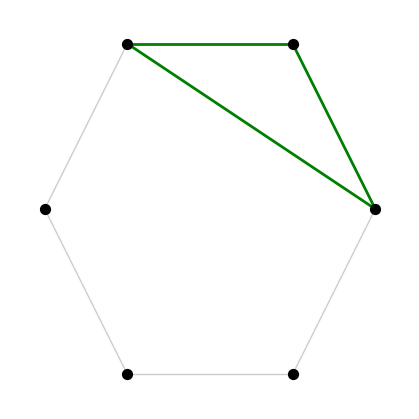

In [11]:
# Build a 6-cycle graph
G = nx.cycle_graph(6)

# Add an extra edge (a chord between node 0 and node 2)
G.add_edge(0, 2)

# Place nodes on a circle for a symmetric layout
pos = nx.circular_layout(G)

# Assign weight 1 to every edge (uniform weights)
sigma = np.ones(len(G.edges()))
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = sigma[i]
# Compute maximum denseness and the corresponding densest subgraph
D, subgraph = d.maximum_denseness(G)
print('This graph is unweighted')
print('Fractional arboricity = ', D)
print('The densest subgraph that maximizes fractional arboricity is in green:')
# Extract the edges that belong to the densest subgraph
J = [(u, v) for (u, v) in G.edges() if u in subgraph and v in subgraph]

# Draw the full graph in light gray
nx.draw(G, pos, node_size=50, node_color="black", edge_color="#ccc")

# Highlight the densest subgraph edges in green
nx.draw_networkx_edges(G, pos, edgelist=J, edge_color="green", width=2)


This graph is unweighted
Fractional arboricity =  5.0
The densest subgraph that maximizes fractional arboricity is in green:


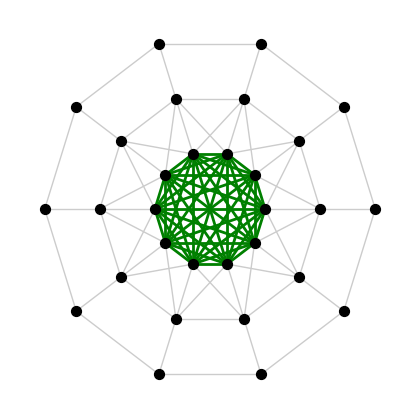

In [12]:
# Create a "nested" graph with 10 vertices using helper function d.create_nested_graph
G, pos = d.create_nested_graph(10)

# Assign uniform weight 1 to every edge in the graph
sigma = np.ones(len(G.edges()))
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = sigma[i]

# Compute the maximum denseness value D and the corresponding densest subgraph (set of vertices)
D, subgraph = d.maximum_denseness(G)
print('This graph is unweighted')
print('Fractional arboricity = ', D)
print('The densest subgraph that maximizes fractional arboricity is in green:')

# Collect the edges that lie entirely inside the densest subgraph
J = [(u, v) for (u, v) in G.edges() if u in subgraph and v in subgraph]

# Draw the entire graph in light gray
nx.draw(G, pos, node_size=50, node_color="black", edge_color="#ccc")

# Highlight the edges of the densest subgraph in green and thicker lines
nx.draw_networkx_edges(G, pos, edgelist=J, edge_color="green", width=2)


## Using fractional arboricity to compute spanning tree modulus

Let $G= (V,E,\sigma)$ be a weighted graph with edge 
weights $\sigma \in \mathbb{R}^E_{>0}$. Let $\mathcal{B}$ 
be the family of spanning trees of $G$. Let $\eta^*$ be the optimal density for $\text{Mod}_{2,\sigma^{-1}}(\widehat{\mathcal{B}})$ where $\widehat{\mathcal{B}}$ is the Fulkerson blocker family of $\mathcal{B}$.

Any subgraph that is optimal for the fractional arboricity problem is said to be a D-optimal subgraph. First, we find a D-optimal subgraph $H$ of $G$ and note that the value $\sigma^{-1} \eta^*$ takes the value $(|V_H|-1)/\sigma(E_{H})$ on all edges in $H$. 

Then, we shrink $H$ to a vertex; this results in a shrunk graph $G_1 = G/H$. Next, find a D-optimal subgraph $H_1$ of $G_1$, and $\sigma^{-1} \eta^*$ (for the spanning tree modulus of $G$) takes the value $(|V_{H_1}|-1)/\sigma(E_{H_1})$ on the edges of $H_1$. 
Repeating this procedure iteratively computes $\sigma^{-1} \eta^*$ for at least one edge. Thus, after a finite number of iterations, $\sigma^{-1} \eta^*$ 
will be computed for all edges. 

|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.667         |          3           |          4           | 
|         0.75         |          4           |          1           | 
Edge colors given by σ^{-1}η* values


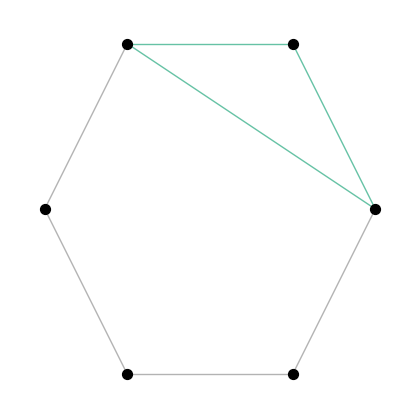

In [6]:
# Create a 6-cycle graph
G = nx.cycle_graph(6)

# Add an extra chord (edge between nodes 0 and 2)
G.add_edge(0, 2)

# Place vertices on a circle for a symmetric layout
pos = nx.circular_layout(G)

# Assign uniform weights (all ones) to each edge
sigma = np.ones(len(G.edges()))
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = sigma[i]
    # also store edge index for later use
    G[u][v]['enum'] = i

# Compute η* (the extremal density vector for spanning-tree modulus, p=1 by default here)
weight_1eta_star = d.modulus(G)

# Plot the graph:
# - nodes in black
# - edge colors given by η* values, mapped through a colormap
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges],
    edge_cmap=plt.cm.Set2
)
print('Edge colors given by σ^{-1}η* values')

|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|         0.2          |          10          |          21          | 
|         0.25         |          11          |          11          | 
|         0.5          |          11          |          1           | 
Edge colors given by σ^{-1}η* values


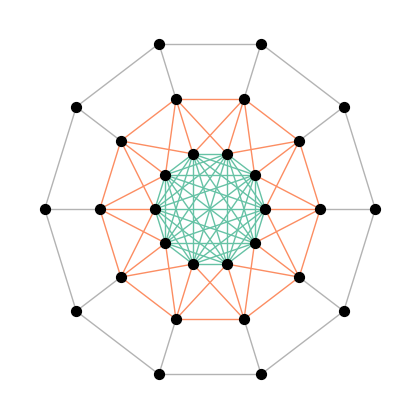

In [7]:
# Create a "nested" graph with 10 vertices (helper function returns graph G and layout pos)
G, pos = d.create_nested_graph(10)

# Assign uniform weights (all ones) to every edge
sigma = np.ones(len(G.edges()))
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = sigma[i]
    # also keep an index for each edge to align with entries of η*
    G[u][v]['enum'] = i

# Compute η* (extremal density vector from modulus computation, here with default p=1)
weight_1eta_star = d.modulus(G)

# Plot the graph:
# - nodes in black
# - edge colors correspond to η* values, mapped through a colormap
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges],
    edge_cmap=plt.cm.Set2
)
print('Edge colors given by σ^{-1}η* values')

## Homogeneous graph reinforcement

Motivated by the idea of increasing edge weights to strengthen a network, we are interested in the problem of increasing the edge weights in a minimum-cost way to transform a matroid into a homogeneous one.  

Consider a weighted graph $G$ with weights $\sigma$ and assume that $G$ is not homogeneous.  

Given a per-unit increase cost $m(e) \geq 0$ for each $e \in E$, the *matroid reinforcement* problem is the following:

$$
\begin{array}{ll}
\underset{ z \in \mathbb{R}^{E}_{\geq 0}}{\text{minimize}} & m^T z \\
\text{subject to} & G \text{ is } (\sigma + z)\text{-homogeneous} .
\end{array}
$$


Original weight = [2, 1, 2, 2, 1, 1]
Compute σ^{-1}η* for the ogirinal graph
|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.333         |          3           |          3           | 
|        0.667         |          3           |          1           | 
costs = [1. 1. 1. 1. 1. 1.]
new weight = [2. 3. 2. 2. 2. 1.]
Compute σ^{-1}η* for the reinforced graph
|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.333         |          5           |          1           | 
Edge colors given by σ^{-1}η* values
Edge labels and thickness given by weights


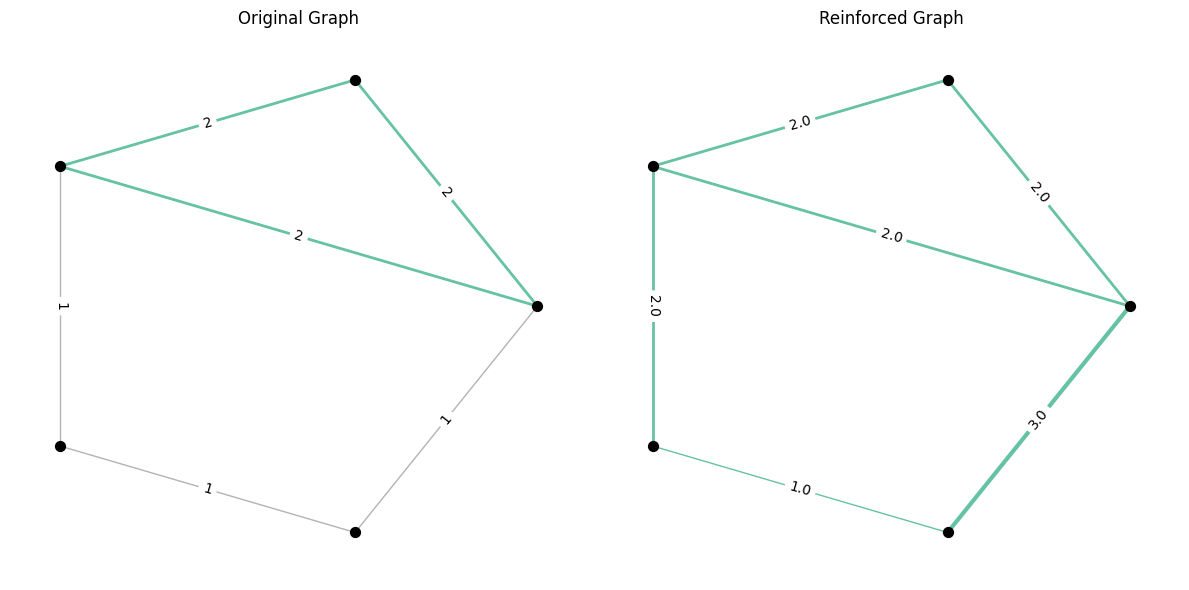

Increasing amount = [0. 2. 0. 0. 1. 0.]
Total cost = 3.0


In [66]:
# Create the graph and position
G, pos = d.create_house_graph()
pos = nx.circular_layout(G)

# Old weights
sigma = [2, 1, 2, 2, 1, 1]
print('Original weight =', sigma)
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = sigma[i]
print('Compute σ^{-1}η* for the ogirinal graph')
# Compute eta^*
weight_1eta_star = d.modulus(G)

# Create subplots to draw both graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph (original graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=sigma, ax=ax1
)
edge_labels = {edge: f"{sigma[i]}" for i, edge in enumerate(G.edges())}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)
ax1.set_title('Original Graph')

# Apply reinforcement
c = np.ones(len(G.edges()))
print('costs =', c)
order_index = list(np.argsort(np.array(c)))
new_weight = d.reinforcement(G, order_index)
print('new weight =', np.round(new_weight, 2))   # round to 2 decimals

# Update the weights
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = new_weight[i]
print('Compute σ^{-1}η* for the reinforced graph')
# Compute eta^* for the reinforced graph
weight_1eta_star = d.modulus(G)
print('Edge colors given by σ^{-1}η* values')
print('Edge labels and thickness given by weights')
# Plot the second graph (reinforced graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=new_weight, ax=ax2
)
edge_labels = {edge: f"{np.round(new_weight, 2)[i]}" for i, edge in enumerate(G.edges())}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax2)
ax2.set_title('Reinforced Graph')

# Display the plots
plt.tight_layout()
plt.show()

# ----- Nicely formatted print section -----
increase = np.array(new_weight) - np.array(sigma)
cost = np.dot(increase, np.array(c))

# Compute and print cost information
print('Increasing amount =', np.round(np.array(new_weight) - np.array(sigma), 2))  # rounded to 2 decimals
print('Total cost =', np.round(cost, 2))


Original weight = [4, 1, 1, 4, 1, 1, 4, 1, 1, 1]
Compute σ^{-1}η* for the ogirinal graph
|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.167         |          3           |          3           | 
|        0.286         |          3           |          1           | 
costs = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
new weight = [4. 4. 3. 4. 1. 1. 4. 1. 1. 1.]
Compute σ^{-1}η* for the reinforced graph
|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.167         |          5           |          1           | 
Edge colors given by σ^{-1}η* values
Edge labels and thickness given by weights


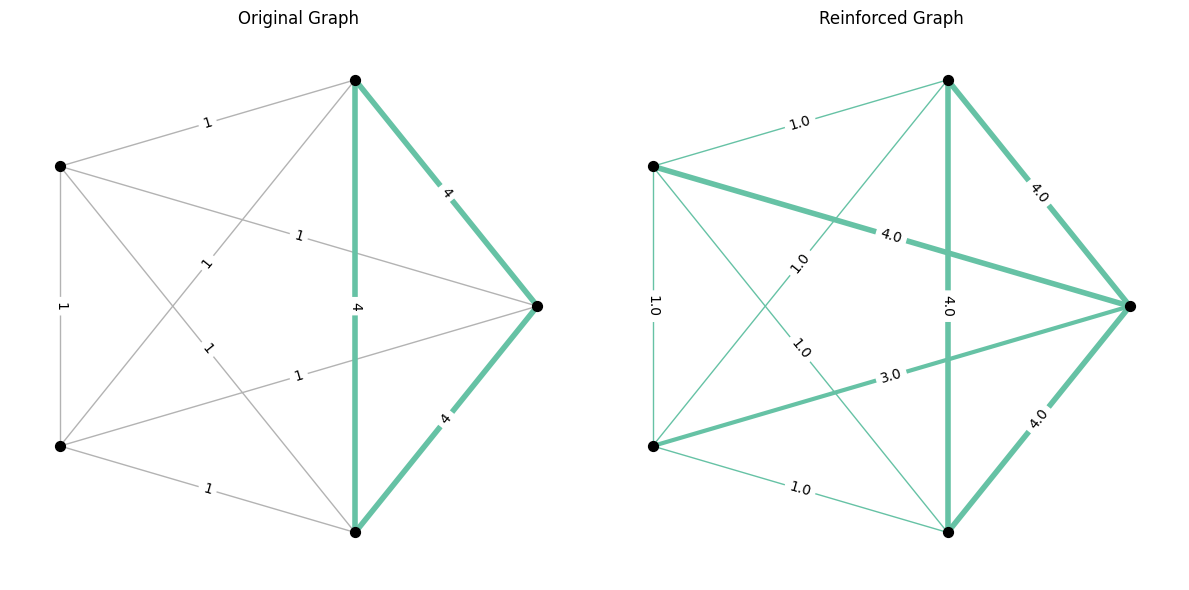

Increasing amount = [-0.  3.  2.  0.  0.  0.  0.  0.  0. -0.]
Total cost = 5.0


In [ ]:
'Graph'
G = nx.complete_graph(5)
'weights'
pos = nx.circular_layout(G)
sigma = [4,1,1,4,1,1,4,1,1,1]
print('Original weight =', sigma)
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = sigma[i]
print('Compute σ^{-1}η* for the ogirinal graph')
# Compute eta^*
weight_1eta_star = d.modulus(G)

# Create subplots to draw both graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph (original graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=sigma, ax=ax1
)
edge_labels = {edge: f"{sigma[i]}" for i, edge in enumerate(G.edges())}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)
ax1.set_title('Original Graph')

# Apply reinforcement
c = np.ones(len(G.edges()))
print('costs =', c)
order_index = list(np.argsort(np.array(c)))
new_weight = d.reinforcement(G, order_index)
print('new weight =', np.round(new_weight, 2))   # round to 2 decimals

# Update the weights
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = new_weight[i]
print('Compute σ^{-1}η* for the reinforced graph')
# Compute eta^* for the reinforced graph
weight_1eta_star = d.modulus(G)
print('Edge colors given by σ^{-1}η* values')
print('Edge labels and thickness given by weights')
# Plot the second graph (reinforced graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=new_weight, ax=ax2
)
edge_labels = {edge: f"{np.round(new_weight, 2)[i]}" for i, edge in enumerate(G.edges())}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax2)
ax2.set_title('Reinforced Graph')

# Display the plots
plt.tight_layout()
plt.show()

# ----- Nicely formatted print section -----
increase = np.array(new_weight) - np.array(sigma)
cost = np.dot(increase, np.array(c))

# Compute and print cost information
print('Increasing amount =', np.round(np.array(new_weight) - np.array(sigma), 2))  # rounded to 2 decimals
print('Total cost =', np.round(cost, 2))


## Homogeneous graph sparsification

Similar to the homogeneous graph reinforcement problem, we also study a minimum-cost strategy for decreasing edge weights,  
which gives rise to the following *matroid sparsification* problem:

$$
\begin{array}{ll}
\underset{ z \in \mathbb{R}^{E}_{\geq 0}}{\text{minimize}} & m^T z \\
\text{subject to} & G \text{ is } (\sigma + z)\text{-homogeneous} .
\end{array}
$$

Original weight = [2, 1, 2, 2, 1, 1]
Compute σ^{-1}η* for the original graph
|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.333         |          3           |          3           | 
|        0.667         |          3           |          1           | 
costs = [1. 1. 1. 1. 1. 1.]
new weight = [0.  1.  1.5 1.5 1.  1. ]
Compute σ^{-1}η* for the sparsified graph
|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.667         |          5           |          1           | 
Edge colors given by σ^{-1}η* values
Edge labels and thickness given by weights


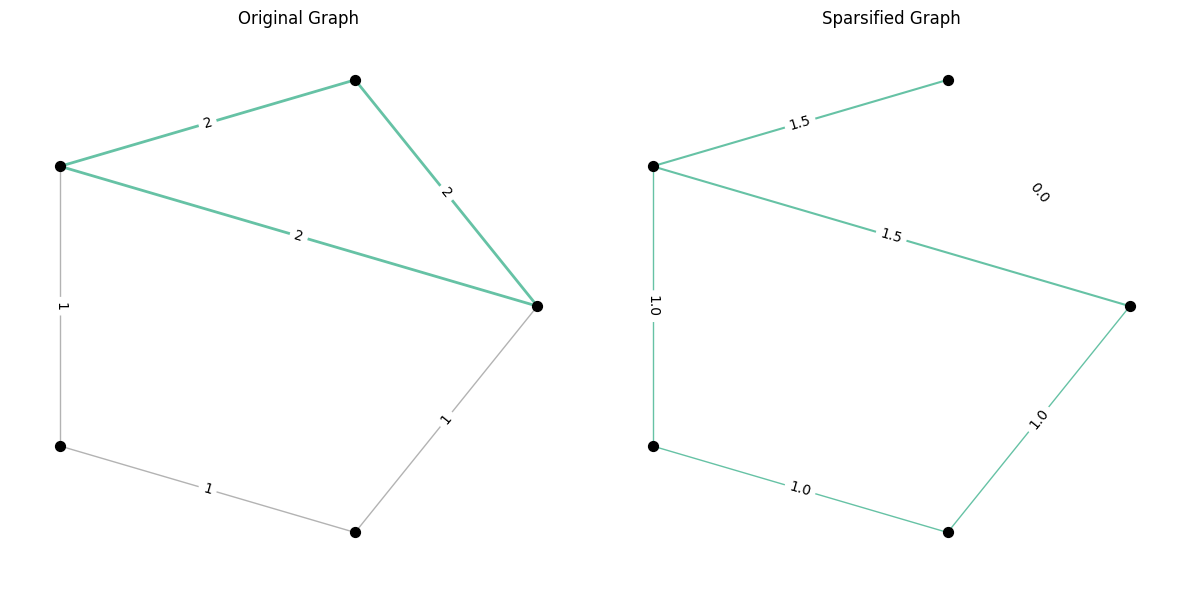

decreasing amount = [2.  0.  0.5 0.5 0.  0. ]
Total cost = -3.0


In [67]:
# Create the graph and position
G, pos = d.create_house_graph()
pos = nx.circular_layout(G)

# Old weights
sigma = [2, 1, 2, 2, 1, 1]
print('Original weight =', sigma)
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = sigma[i]
print('Compute σ^{-1}η* for the original graph')
# Compute eta^*
weight_1eta_star = d.modulus(G)

# Create subplots to draw both graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph (original graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=sigma, ax=ax1
)
edge_labels = {edge: f"{sigma[i]}" for i, edge in enumerate(G.edges())}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)
ax1.set_title('Original Graph')

# Apply reinforcement
c = np.ones(len(G.edges()))
print('costs =', c)
order_index = list(np.argsort(np.array(c)))
new_weight = d.sparsification(G, order_index)
print('new weight =', np.round(new_weight, 2))   # round to 2 decimals

# Update the weights
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = new_weight[i]
print('Compute σ^{-1}η* for the sparsified graph')
# Compute eta^* for the reinforced graph
weight_1eta_star = d.modulus(G)
print('Edge colors given by σ^{-1}η* values')
print('Edge labels and thickness given by weights')
# Plot the second graph (reinforced graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=new_weight, ax=ax2
)
edge_labels = {edge: f"{np.round(new_weight, 2)[i]}" for i, edge in enumerate(G.edges())}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax2)
ax2.set_title('Sparsified Graph')

# Display the plots
plt.tight_layout()
plt.show()

# ----- Nicely formatted print section -----
increase = np.array(new_weight) - np.array(sigma)
cost = np.dot(increase, np.array(c))

# Compute and print cost information
print('decreasing amount =',  np.array(sigma)-np.round(np.array(new_weight), 2))  # rounded to 2 decimals
print('Total cost =', np.round(cost, 2))


Original weight = [4, 1, 1, 4, 1, 1, 4, 1, 1, 1]
Compute σ^{-1}η* for the original graph
|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.167         |          3           |          3           | 
|        0.286         |          3           |          1           | 
costs = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
new weight = [0.  1.  1.  3.5 1.  1.  3.5 1.  1.  1. ]
Compute σ^{-1}η* for the sparsified graph
|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.286         |          5           |          1           | 
Edge colors given by σ^{-1}η* values
Edge labels and thickness given by weights


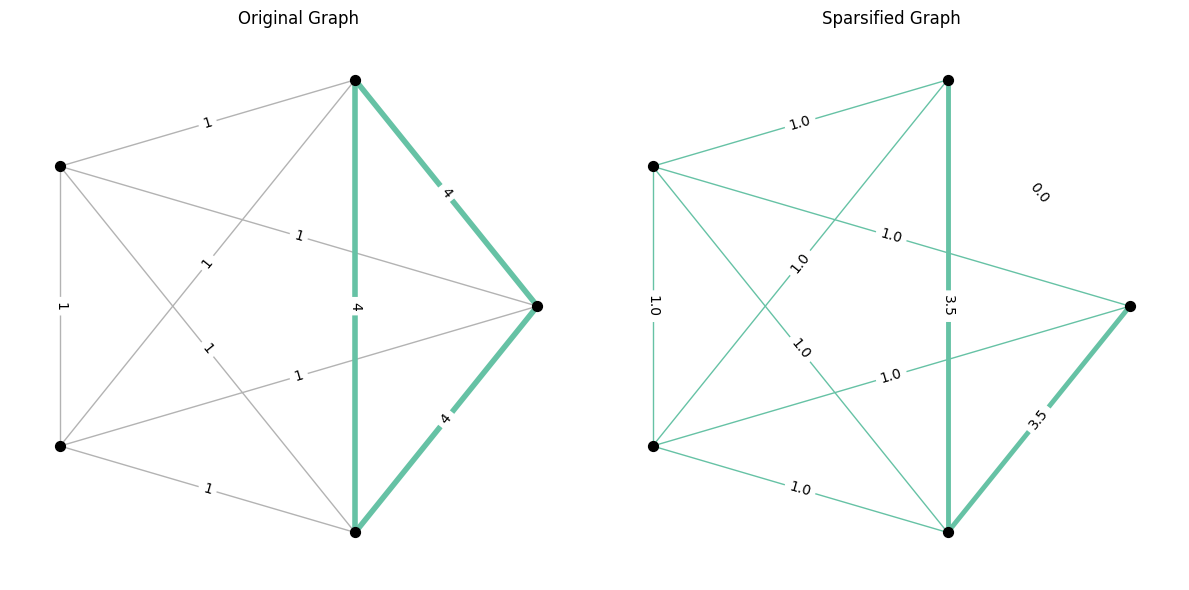

decreasing amount = [4.  0.  0.  0.5 0.  0.  0.5 0.  0.  0. ]
Total cost = -5.0


In [49]:
'Graph'
G = nx.complete_graph(5)
'weights'
pos = nx.circular_layout(G)
sigma = [4,1,1,4,1,1,4,1,1,1]
print('Original weight =', sigma)
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = sigma[i]
print('Compute σ^{-1}η* for the original graph')
# Compute eta^*
weight_1eta_star = d.modulus(G)

# Create subplots to draw both graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph (original graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=sigma, ax=ax1
)
edge_labels = {edge: f"{sigma[i]}" for i, edge in enumerate(G.edges())}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)
ax1.set_title('Original Graph')

# Apply reinforcement
c = np.ones(len(G.edges()))
print('costs =', c)
order_index = list(np.argsort(np.array(c)))
new_weight = d.sparsification(G, order_index)
print('new weight =', np.round(new_weight, 2))   # round to 2 decimals

# Update the weights
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = new_weight[i]
print('Compute σ^{-1}η* for the sparsified graph')
# Compute eta^* for the reinforced graph
weight_1eta_star = d.modulus(G)
print('Edge colors given by σ^{-1}η* values')
print('Edge labels and thickness given by weights')
# Plot the second graph (reinforced graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=new_weight, ax=ax2
)
edge_labels = {edge: f"{np.round(new_weight, 2)[i]}" for i, edge in enumerate(G.edges())}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax2)
ax2.set_title('Sparsified Graph')

# Display the plots
plt.tight_layout()
plt.show()

# ----- Nicely formatted print section -----
increase = np.array(new_weight) - np.array(sigma)
cost = np.dot(increase, np.array(c))

# Compute and print cost information
print('decreasing amount =',  np.array(sigma)-np.round(np.array(new_weight), 2))  # rounded to 2 decimals
print('Total cost =', np.round(cost, 2))


Note that the new weights obtained after sparsification may include zeros. Removing edges with weight zero does not disconnect the graph.

## Large Graph Example


This graph is unweighted
Compute η* for the ogirinal graph
|    sigma^{-1}eta     |     #node_shrunk     |     #node_remain     |
+----------------------+----------------------+----------------------+
|        0.141         |          29          |         122          | 
|        0.143         |          3           |         120          | 
|        0.167         |          2           |         119          | 
|        0.175         |          23          |          97          | 
|        0.191         |          31          |          67          | 
|         0.2          |          22          |          46          | 
|         0.2          |          2           |          45          | 
|        0.205         |          26          |          20          | 
|        0.214         |          4           |          17          | 
|        0.222         |          3           |          15          | 
|        0.273         |          4           |          12          | 
|      

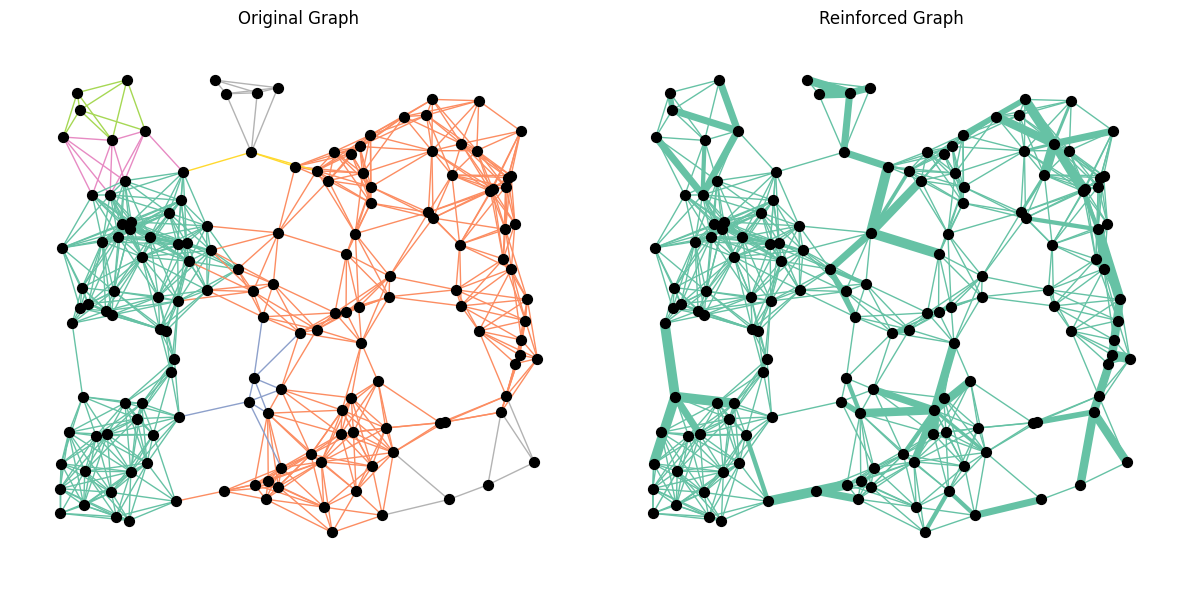

Total cost = 257.64


In [65]:
G = nx.random_geometric_graph(150, 0.16, seed=3810312)
pos = {v:d['pos'] for v,d in G.nodes(data=True)}
print('This graph is unweighted')
sigma  = np.ones(len(G.edges()))
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = sigma[i]
print('Compute η* for the ogirinal graph')
# Compute eta^*
weight_1eta_star = d.modulus(G)

# Create subplots to draw both graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph (original graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=sigma, ax=ax1
)
ax1.set_title('Original Graph')

# Apply reinforcement
c = np.ones(len(G.edges()))
order_index = list(np.argsort(np.array(c)))
new_weight = d.reinforcement(G, order_index)

# Update the weights
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['weight'] = new_weight[i]
print('Compute σ^{-1}η* for the reinforced graph')
# Compute eta^* for the reinforced graph
weight_1eta_star = d.modulus(G)
print('Edge colors given by σ^{-1}η* values')
print('Edge thickness given by weights')
# Plot the second graph (reinforced graph)
nx.draw(
    G, pos,
    node_color="black", node_size=50,
    edge_color=[weight_1eta_star[G[u][v]['enum']] for (u, v) in G.edges()],
    edge_cmap=plt.cm.Set2, width=new_weight, ax=ax2
)
ax2.set_title('Reinforced Graph')

# Display the plots
plt.tight_layout()
plt.show()

# ----- Nicely formatted print section -----
increase = np.array(new_weight) - np.array(sigma)
cost = np.dot(increase, np.array(c))

# Compute and print cost information
print('Total cost =', np.round(cost, 2))
